# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attrmpt to build a machine learning model capable of predicting wherther or not someone has heart disease based on their medical attributes.

we're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whetehr or not they have heart disease  

## 2.Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3.Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4.Features

> This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of diseasesupply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exerciseST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 
plt.style.use("seaborn-v0_8-whitegrid")

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score


## Load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Let's find out how many of each class there 
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

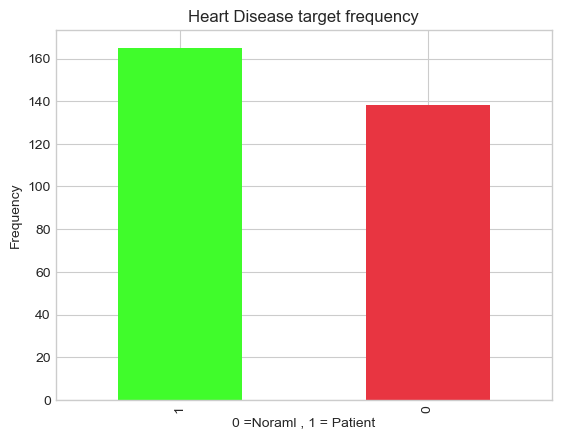

In [5]:
df.target.value_counts().plot(kind="bar" , color=["#40fc2b","#e83541"])
plt.title("Heart Disease target frequency")
plt.xlabel("0 =Noraml , 1 = Patient")
plt.ylabel("Frequency");

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are they any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Check the disribution of the age column with a histogram

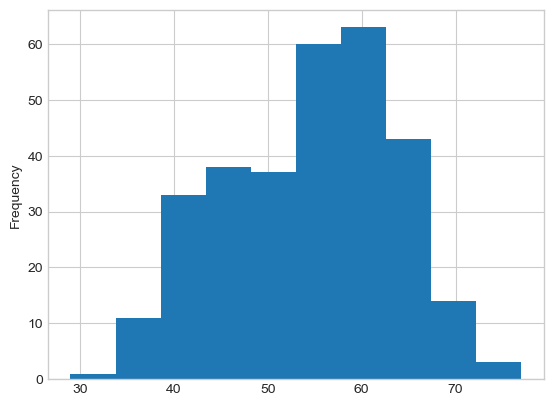

In [9]:
df.age.plot.hist();

## Heart Disease Frequency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


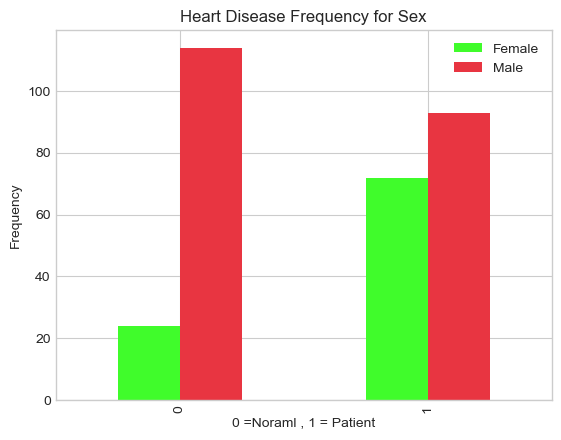

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["#40fc2b","#e83541"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 =Noraml , 1 = Patient")
plt.ylabel("Frequency")
plt.legend(["Female","Male"]);

### Age vs.  Cholestoral  for Heart Disease

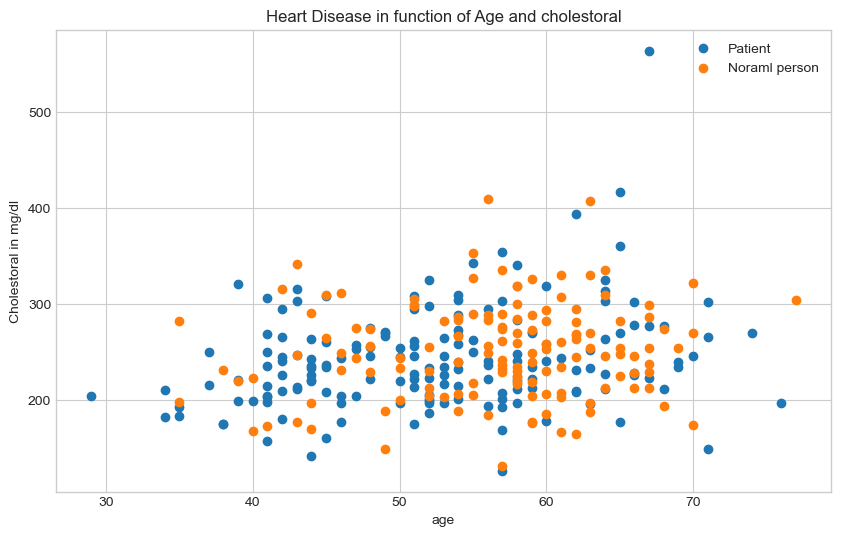

In [13]:
plt.figure(figsize=(10,6))
# Scatter for Patient
plt.scatter(df.age[df.target==1],df.chol[df.target==1]);
# Scatter for Noraml person
plt.scatter(df.age[df.target==0],df.chol[df.target==0]);

plt.title("Heart Disease in function of Age and cholestoral")
plt.xlabel("age")
plt.ylabel("Cholestoral in mg/dl")
plt.legend(["Patient","Noraml person"]);

### Age vs. Max Heart Rate for Heart Disease

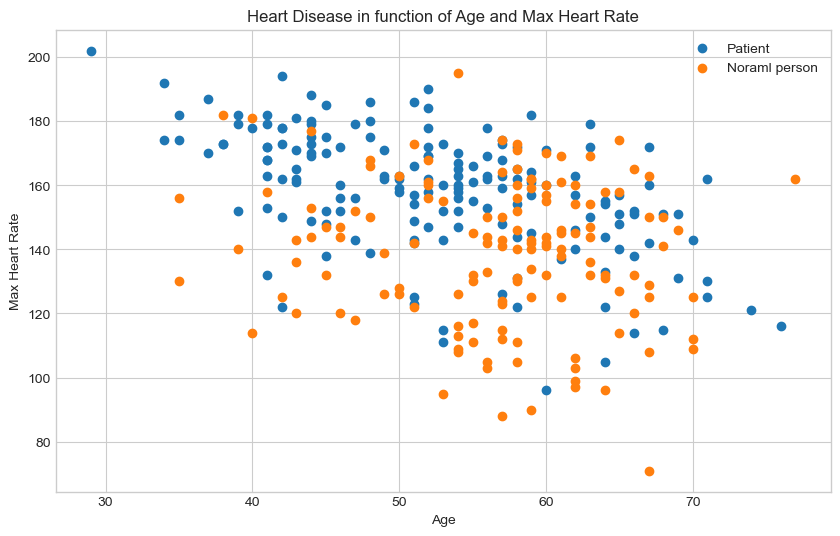

In [14]:
plt.figure(figsize=(10,6))

# Scatter for Patient
plt.scatter(df.age[df.target==1],df.thalach[df.target==1]);

# Scatter for Noraml person
plt.scatter(df.age[df.target==0],df.thalach[df.target==0]);


plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Patient","Noraml person"]);

### Heart Disease Frequency per chest pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of diseasesupply to the heart

In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


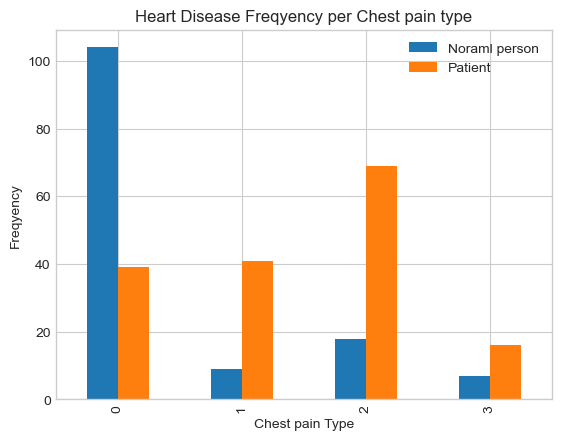

In [16]:
pd.crosstab(df.cp,df.target).plot.bar();
plt.title("Heart Disease Freqyency per Chest pain type")
plt.xlabel("Chest pain Type")
plt.ylabel("Freqyency")
plt.legend(["Noraml person","Patient"]);

In [17]:
### Age vs. ST depression for Heart Disease

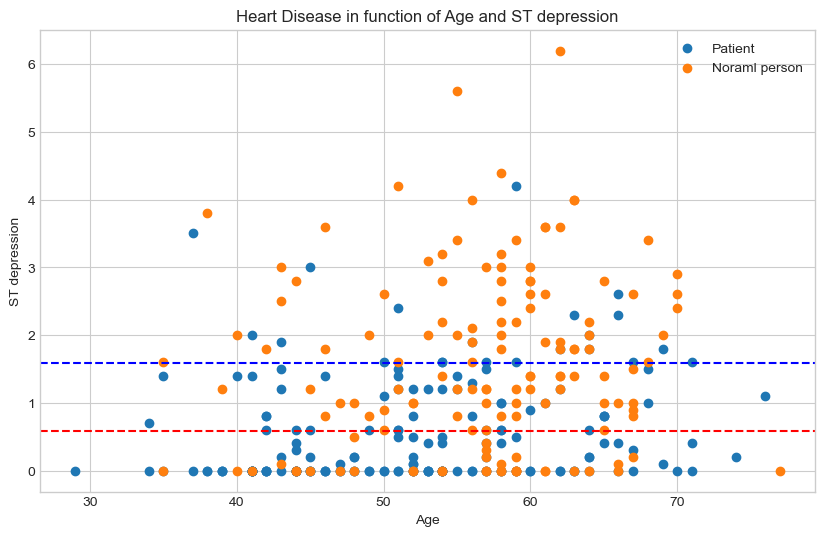

In [18]:
plt.figure(figsize=(10,6))

# Scatter for Patient
plt.scatter(df.age[df.target==1],df.oldpeak[df.target==1])

# Scatter for Noraml person
plt.scatter(df.age[df.target==0],df.oldpeak[df.target==0])


plt.title("Heart Disease in function of Age and ST depression")
plt.xlabel("Age")
plt.ylabel("ST depression")
plt.legend(["Patient","Noraml person"]);
plt.axhline(df.oldpeak[df.target==1].mean(),color="r",linestyle ="--" ) 
plt.axhline(df.oldpeak[df.target==0].mean(),color="b",linestyle ="--" ) ;

# Make a correlation matrix

In [19]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


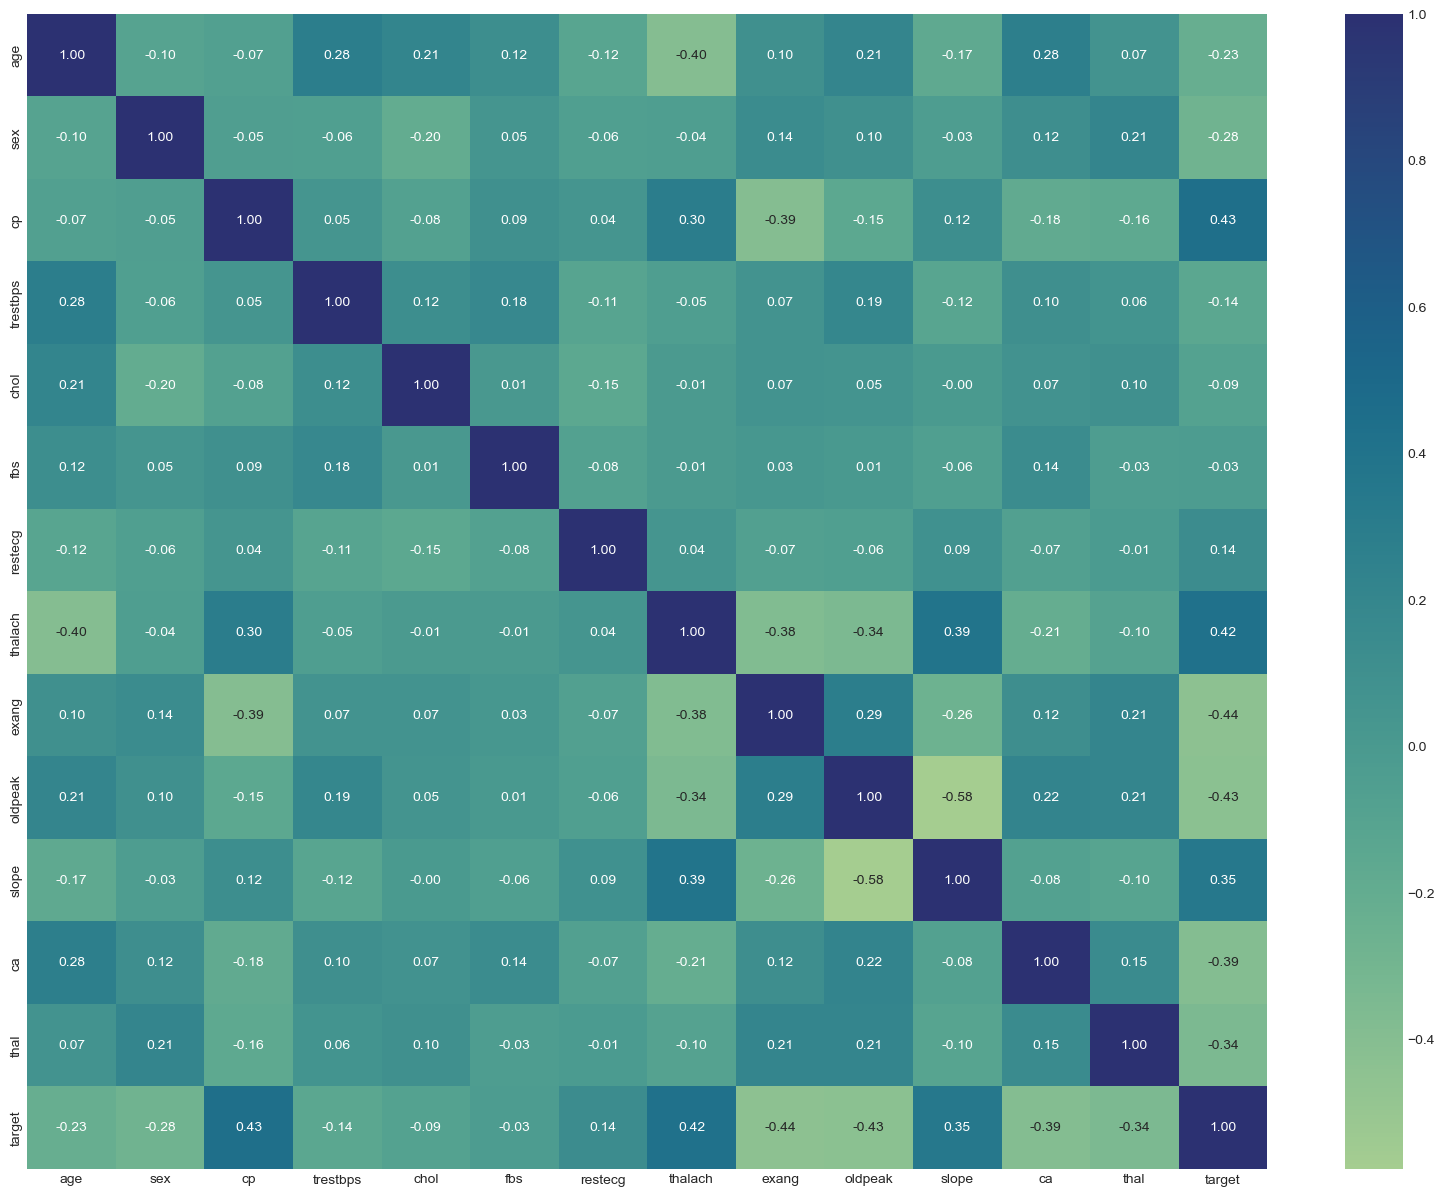

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="crest");

## 5. Modelling 

In [21]:
# Split data into X and y
X = df.drop("target",axis=1)
y = df.target

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
# Split into train and test set
X_train ,X_test ,y_train ,y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3


In [26]:
y_train

234    0
190    0
185    0
281    0
172    0
      ..
302    0
229    0
69     1
259    0
115    1
Name: target, Length: 242, dtype: int64

### we're going to try 3 diffrent machine learning models:
1. Logistic Regresson
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
# Put models in a dictionary
models ={"Logistic Regresson" : LogisticRegression() ,
         "K-Nearest Neighbours Classifier" : KNeighborsClassifier(),
          "Random Forest Classifier" : RandomForestClassifier()
        }

# Create a function to fit and score models
def fit_and_score(models) :
    """
    Fits and evaluates given machine learning models.
    models : a dict of different  Sckit-Learn machine learning models
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores ={}
    # Loop throuth models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train , y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test ,y_test) 
    return model_scores

model_scores = fit_and_score(models)

C:\Users\User\Desktop\data_science_project\heart_desease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model comparison

,Logistic Regresson,K-Nearest Neighbours Classifier,Random Forest Classifier
accuracy,0.803279,0.655738,0.786885


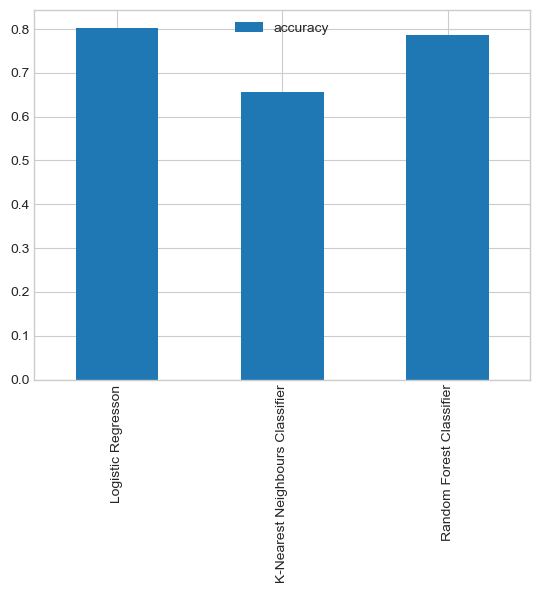

In [28]:
model_compare = pd.DataFrame(model_scores , index=["accuracy"])
model_compare.T.plot.bar()
model_compare

Now we'got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off.what should do? 

Let's look at the following:
* Hypyterparameter tuning
* Featur importance
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* Roc curve
* Are under the curve (AUC)

### Hyperparameter tuning (by hand)

In [29]:
# Let's tune KNN
train_scores =[]
test_scores = []

# Create  a list of diffrent values for n_neighbors
neighbors = range(1,20,1)

# Setup KNN instance
knn =  KNeighborsClassifier()

# Loop through diffrent n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train , y_train)
    
    # Update the trainning and test scores
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [30]:
train_scores

[1.0,
 0.7892561983471075,
 0.7851239669421488,
 0.7479338842975206,
 0.7479338842975206,
 0.756198347107438,
 0.7727272727272727,
 0.78099173553719,
 0.7479338842975206,
 0.731404958677686,
 0.7231404958677686,
 0.6818181818181818,
 0.6900826446280992,
 0.6694214876033058,
 0.6776859504132231,
 0.6776859504132231,
 0.6735537190082644,
 0.6983471074380165,
 0.6570247933884298]

In [31]:
test_scores

[0.6229508196721312,
 0.47540983606557374,
 0.6065573770491803,
 0.6065573770491803,
 0.6557377049180327,
 0.5573770491803278,
 0.639344262295082,
 0.5737704918032787,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6065573770491803,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.639344262295082,
 0.6885245901639344]

Maximum KNN score on the test data : 70.491803%


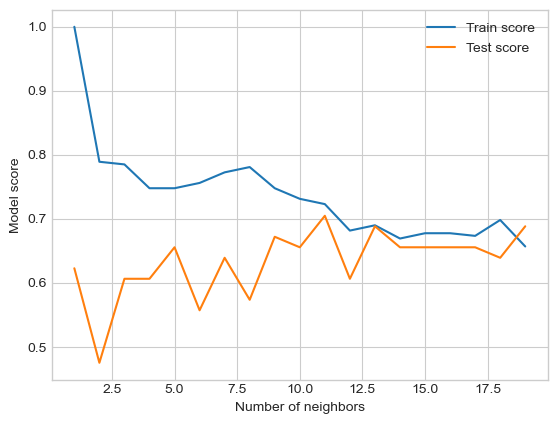

In [32]:
plt.plot(neighbors , train_scores , label = "Train score")
plt.plot(neighbors , test_scores , label = "Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();
print(f"Maximum KNN score on the test data : {max(test_scores)*100:2f}%")

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [33]:
# Creat a hyperparameter grid for logisticRegression
log_reg_grid ={"C" : np.logspace(-4,4,30) ,
               "solver" : ["liblinear" ]}

# Create a hyperparameter grid for RandomForestClassifier
rfc_grid = {"n_estimators": [int(x) for x in np.linspace(start = 10, stop = 1000, num = 50)],
           "max_depth" : [int(x) for x in np.linspace(10, 110, num = 11)],
          "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(2, 20, 2),
           "bootstrap" : [True, False],}

In [34]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=30,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 9.236708571873866}

In [36]:
# Evaluate
rs_log_reg.score(X_test,y_test)

0.8032786885245902

In [37]:
# Tune RandomForestClassifier

np.random.seed(42)


# Setup random hyperparameter search for RandomForestClassifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rfc_grid,
                           cv=5,
                           n_iter=100,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [10, 30, 50, 70, 90,
                                                         111, 131, 151, 171,
                                                         191, 212, 232, 252,
                                                         272, 292, 313, 333,
                                                         353, 373, 393, 414,
                                                         434, 454, 474, 494,
                                                         515, 535, 555, 575,
                                                         595, ...]},
                   verbose=True)

In [38]:
# Find the best hyperparameters
rs_rfc.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 16,
 'max_depth': 80,
 'bootstrap': True}

In [39]:
# Evaluate
rs_rfc.score(X_test,y_test)

0.8360655737704918

## Hyperparamter Yuning with GridSearchCV

In [40]:
# Creat a hyperparameter grid for logisticRegression
log_reg_grid ={"C" : np.logspace(-4,4,30) ,
               "solver" : ["liblinear" ]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train , y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [41]:
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [42]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8032786885245902

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation used where possible

In [43]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)

In [44]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [45]:
y_test

162    1
95     1
299    0
64     1
216    0
      ..
200    0
44     1
161    1
231    0
102    1
Name: target, Length: 61, dtype: int64

In [46]:
# Confusion matrix
print(confusion_matrix(y_test , y_preds))

[[16  7]
 [ 5 33]]


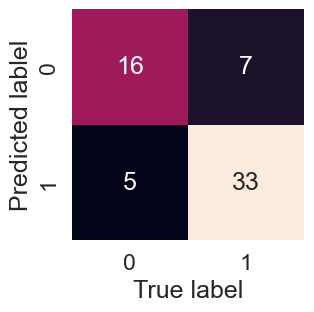

In [47]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted lablel")
    
plot_conf_mat(y_test, y_preds)

In [48]:
 # Plot ROC curve and calculate and AUC metric
from sklearn import metrics

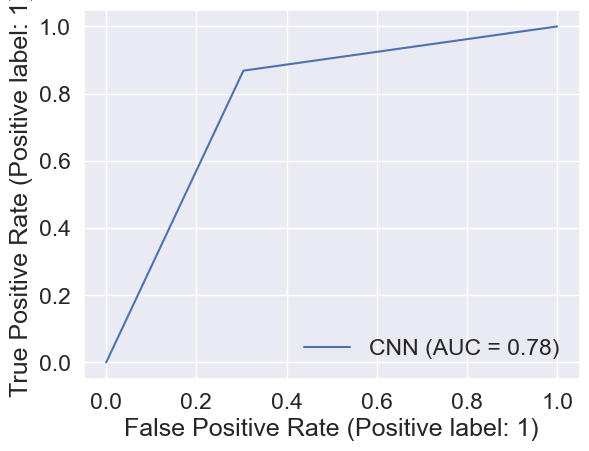

In [49]:
metrics.RocCurveDisplay.from_predictions(
   y_test, y_preds, name="CNN")

plt.show()

In [50]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        23
           1       0.82      0.87      0.85        38

    accuracy                           0.80        61
   macro avg       0.79      0.78      0.79        61
weighted avg       0.80      0.80      0.80        61



### Calculate evaluation metrics using cross-validation
we're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be usimng `cross_val_score()`

In [53]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 9.236708571873866, 'solver': 'liblinear'}

In [54]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 9.236708571873866,
                         solver = "liblinear")

In [65]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.86885246, 0.83606557, 0.86666667, 0.71666667])

In [66]:
cv_acc = cv_acc.mean()
cv_acc

0.8215846994535518

In [67]:
# Cross-validated precision
cv_pre = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_pre

array([0.78947368, 0.90322581, 0.84848485, 0.83783784, 0.71052632])

In [68]:
cv_pre = cv_pre.mean()
cv_pre

0.8179096985548598

In [69]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall

array([0.90909091, 0.84848485, 0.84848485, 0.93939394, 0.81818182])

In [71]:
cv_recall = cv_recall.mean()
cv_recall

0.8727272727272727

In [74]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1

array([0.84507042, 0.875     , 0.84848485, 0.88571429, 0.76056338])

In [75]:
cv_f1 = cv_f1.mean()
cv_f1

0.8429665874032072

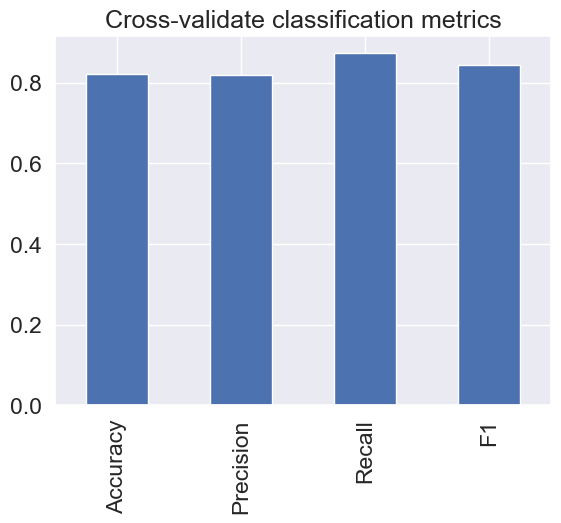

In [78]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_pre,
                          "Recall" : cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title = "Cross-validate classification metrics",
                    legend=False);